In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

import plotly
plotly.io.orca.config.executable = r"C:\Users\Debidutta\anaconda3\pkgs\plotly-orca-1.3.1-1\orca_app\orca.exe"
plotly.io.orca.config.save()

In [2]:
df = pd.read_csv("swiggy_top_restaurant_foods_bengaluru.csv")

In [3]:
df.head()

,restaurant_name,area,ratings,no_of_ratings_greater_than_equal_to,item_name,item_category,item_price,item_description,bestseller_tag
0,Burger King,"Opposite To West Side, Shivaji Nagar",4.2,1000,Hashbrown,Recommended,29.0,What every potato wants to be.,0
1,Burger King,"Opposite To West Side, Shivaji Nagar",4.2,1000,King Egg Burger,Recommended,60.0,No description available,0
2,Burger King,"Opposite To West Side, Shivaji Nagar",4.2,1000,King Egg Double Patty Burger,Recommended,80.0,No description available,1
3,Burger King,"Opposite To West Side, Shivaji Nagar",4.2,1000,King Egg with Cheese,Recommended,80.0,No description available,0
4,Burger King,"Opposite To West Side, Shivaji Nagar",4.2,1000,King Egg Wrap,Recommended,80.0,A fresh and fluffy egg patty loaded with juic...,0


In [4]:
df.describe()

,ratings,no_of_ratings_greater_than_equal_to,item_price,bestseller_tag
count,425.000000,425.000000,425.000000,425.000000
mean,4.350353,470.588235,233.462918,0.080000
std,0.131594,443.459686,179.980554,0.271613
min,4.200000,100.000000,0.000000,0.000000
25%,4.200000,100.000000,119.000000,0.000000
50%,4.400000,100.000000,165.710000,0.000000
75%,4.500000,1000.000000,299.000000,0.000000
max,4.500000,1000.000000,1012.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   restaurant_name                      425 non-null    object 
 1   area                                 425 non-null    object 
 2   ratings                              425 non-null    float64
 3   no_of_ratings_greater_than_equal_to  425 non-null    int64  
 4   item_name                            425 non-null    object 
 5   item_category                        425 non-null    object 
 6   item_price                           425 non-null    float64
 7   item_description                     425 non-null    object 
 8   bestseller_tag                       425 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 30.0+ KB


## Costliest item per restaurant

In [6]:
df.groupby(by="restaurant_name")["item_price"].max()

restaurant_name
Burger King               1012.00
Polar Bear                 959.00
The Belgian Waffle Co.     665.71
Name: item_price, dtype: float64

## Ratings per restaurant

In [7]:
df.groupby(by="restaurant_name")["ratings"].max()

restaurant_name
Burger King               4.2
Polar Bear                4.4
The Belgian Waffle Co.    4.5
Name: ratings, dtype: float64

### Total number of ratings per restaurant

In [8]:
df.groupby(by="restaurant_name")["no_of_ratings_greater_than_equal_to"].max()

restaurant_name
Burger King               1000
Polar Bear                 100
The Belgian Waffle Co.     100
Name: no_of_ratings_greater_than_equal_to, dtype: int64

## Number of bestsellers per restaurant

In [9]:
df.groupby(by="restaurant_name")["bestseller_tag"].sum()

restaurant_name
Burger King               12
Polar Bear                 6
The Belgian Waffle Co.    16
Name: bestseller_tag, dtype: int64

## Restaurant by number of food items

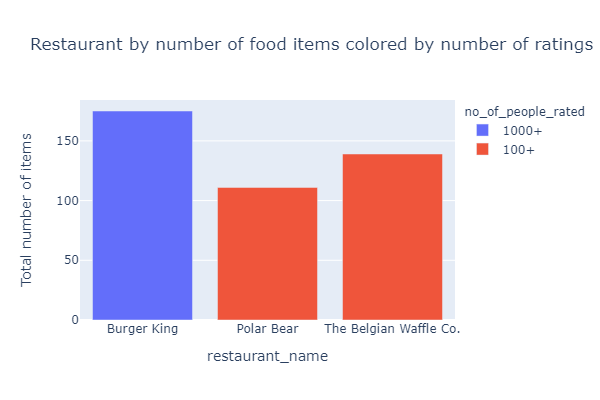

In [10]:
t = pd.DataFrame(df.groupby(by=['restaurant_name'])['item_name'].count())
t['ratings'] = [4.2,4.4,4.5]
t['no_of_people_rated'] = ['1000+','100+','100+']
t.reset_index(inplace=True)
t.rename(columns={'item_name': 'Total number of items'}, inplace=True)
# sns.barplot(x=t.index, y=t["item_name"], data=t)
fig = px.bar(t, x=t['restaurant_name'], y=t['Total number of items'],
             hover_data=['Total number of items', 'ratings','no_of_people_rated'], color='no_of_people_rated',
             title=" Restaurant by number of food items colored by number of ratings received",
             labels=dict(item_price="Item Price (INR)", item_name=""),
             height=550)
fig.show('png', width= 600, height=400)

#### Note --------

* Burger King has 175 items and rated at 4.2
* Polar Bear and The Belgian Waffle are serving 111 and 139 items and are rated at 4.4 and 4.5 respectively.
* Burger King has 1000+ ratings while Polar Bear and The Belgian Waffle are at 100+ respectively.


<footer>Hypothesis : More number of food items might lead to more people buying

## Which food items sells most per restaurant?

### Restaurant 1: Burger King

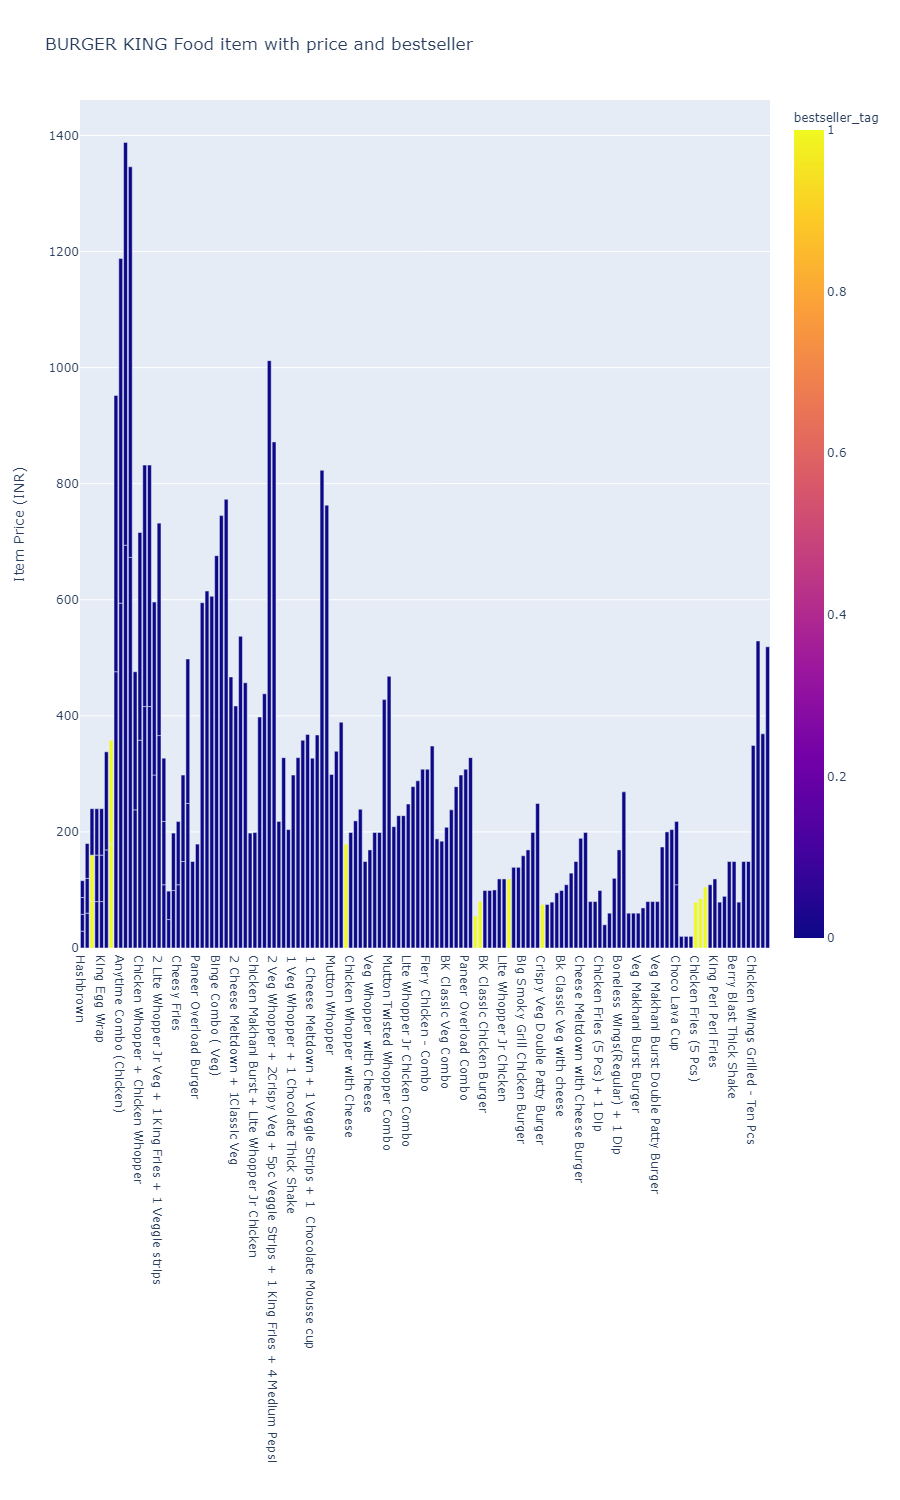

In [11]:
r1 = df.groupby(by='restaurant_name').get_group('Burger King')
fig = px.bar(r1, x='item_name', y='item_price',
             hover_data=['item_name', 'item_price', 'item_category'], color='bestseller_tag', 
             title=" BURGER KING Food item with price and bestseller",
             labels=dict(item_price="Item Price (INR)", item_name=""),
             height=550)
fig.show('png', height=1500, width=900)

##### Bestseller items range from 80 INR to 179 INR

### Restaurant 2: Polar Bear

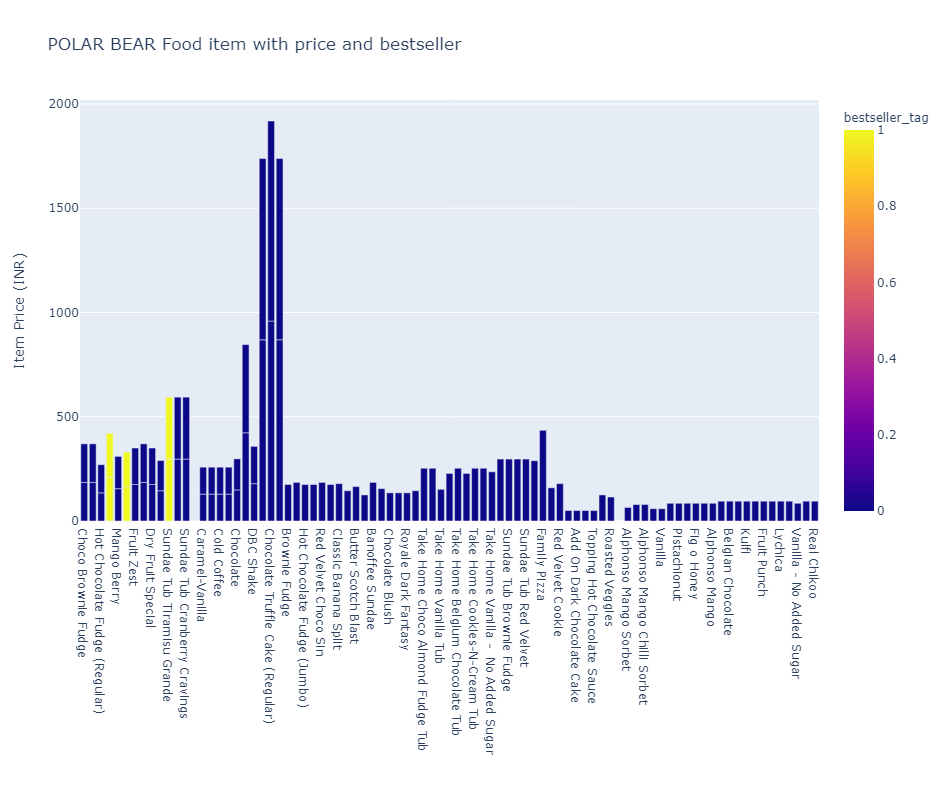

In [12]:
r2 = df.groupby(by='restaurant_name').get_group('Polar Bear')
fig = px.bar(r2, x='item_name', y='item_price',
             hover_data=['item_name', 'item_price', 'item_category'], color='bestseller_tag', 
             title="POLAR BEAR Food item with price and bestseller",
             labels=dict(item_price="Item Price (INR)", item_name=""),
             height=650)
fig.show('png', width=950, height=800)

##### Bestseller items range from 165 INR to 297 INR

### Restaurant 3: 

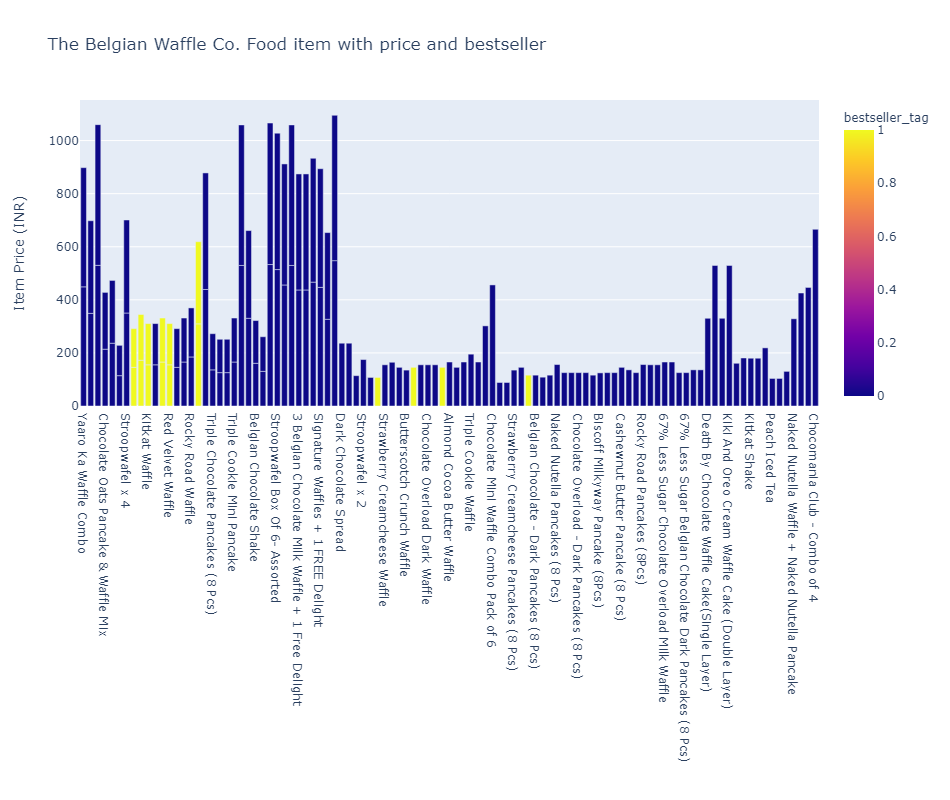

In [13]:
r3 = df.groupby(by='restaurant_name').get_group('The Belgian Waffle Co.')
fig = px.bar(r3, x='item_name', y='item_price',
             hover_data=['item_name', 'item_price', 'item_category'], color='bestseller_tag', 
             title="The Belgian Waffle Co. Food item with price and bestseller",
             labels=dict(item_price="Item Price (INR)", item_name=""),
             height=400)
fig.show('png', width=950, height=800)

#### Bestseller items range from 108 INR to 310 INR

#### Note --------

People prefer the range to buy from

* Burger King: ₹80 to ₹179
* Polar Bear: ₹165 to ₹297
* The Belgian Waffle Co.: ₹108 to ₹310


Items people are buying:

* Burger King: 
    - King Egg Double patty burger (₹80)
    - Fiery Chicken Burger (₹179)
    - Chicken Whopper (₹179)
    - Crispy Veg Burger (₹55)
    - Crispy chicken burger (₹80)
    - Crispy chicken double patty burger (₹119)
    - Crispy veg double patty burger (₹75)
    - Chicken Fries 5 pcs (₹75)
    - Medium Fries (₹85)
    - Medium peri peri fries (₹105)
    
* Polar Bear:
    - Death by chocolate (₹210)
    - Gudbud (₹165)
    - Sundae Tub Tiramisu Grande (₹297)
    
* The Belgian Waffle Co.:
    - Naked Nutella Waffle (₹142.71)
    - Belgian Chocolate Milk Waffle (₹172.38)
    - KitKat Waffle (₹155.24)
    - Triple chocolate Waffle (₹165.24)
    - Red Velvet Waffle (₹155.24)
    - Chocolate Mini Waffle combo pack of 4 (₹309.52)
    - Maple Butter Waffle (₹107.62)
    - Coffee Mocha Waffle (₹145.71)
    - Kiki and Orea cream waffle (₹145.71)
    - Belgian Chocolate Milk Pancake 8 pcs (₹116.19)   

## Which category are people buying from?

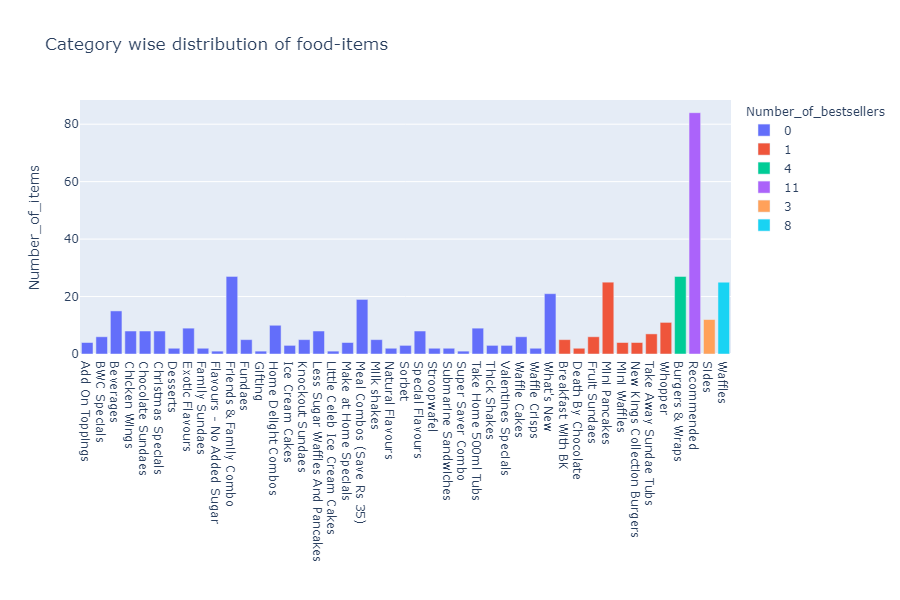

In [14]:
t = pd.DataFrame(df.groupby(by='item_category')["item_name"].count())
t.reset_index(inplace=True)
t1 = pd.DataFrame(df.groupby(by='item_category')["bestseller_tag"].sum())
t["Number_of_bestsellers"] = list(t1.bestseller_tag)
t["Number_of_bestsellers"] = t["Number_of_bestsellers"].astype(str)
t.rename(columns={"item_category": 'Category_name', "item_name":"Number_of_items"}, inplace=True)

fig = px.bar(t, x='Category_name', y='Number_of_items',
             hover_data=['Category_name', 'Number_of_items'],
             title="Category wise distribution of food-items", color = "Number_of_bestsellers",
             labels=dict(Category_name=""),
             height=600)
fig.show('png', width=900, height=600)

#### Note ----

* People do buy recommended category items as it is having the most number bestsellers
* Categories with number of bestsellers are listed below:
    - Waffles - 8 bestsellers
    - Burgers and Wraps - 4 bestsellers
    - Sides - 3 bestsellers

## Price and sales relation

### Cheapest bestselling and costliest bestselling

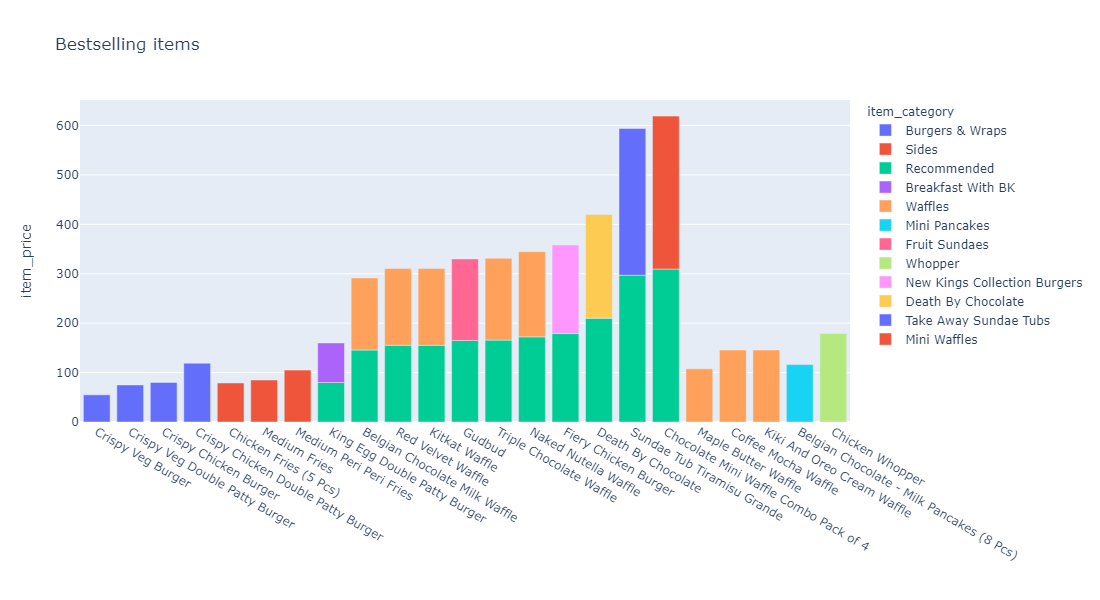

In [15]:
p = df[df["bestseller_tag"] == 1].sort_values(by=['item_price'])

fig = px.bar(p, x='item_name', y='item_price',
             hover_data=['item_name', 'item_price', 'item_category', 'restaurant_name'],
             title="Bestselling items", color = "item_category",
             labels=dict(item_name=""),
             height=700)
fig.show('png', width=1100, height=600)

#### Notes---

* Bestselling ranges from ₹55 to ₹310
* Most bestsellers belong to the recommended category followed by Waffles
* Recommendation category ranges from ₹80 to ₹310

## What are people searching for?

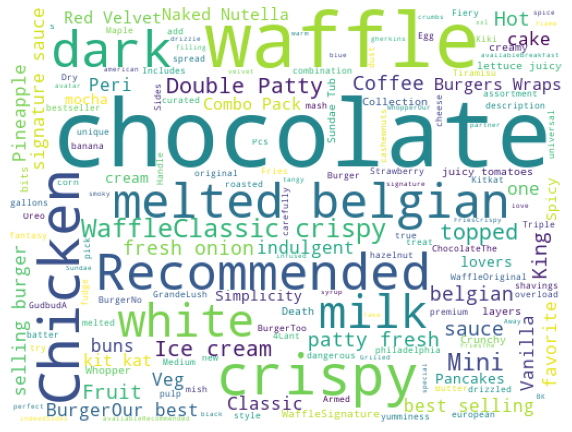

In [16]:
a = p["item_name"]+p["item_description"]+p["item_category"]
plt.subplots(figsize = (10,10))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(' '.join(a))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.show()